# **Importing Libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier

# **Loading Data**

In [2]:
df = pd.read_csv("/content/amazon.csv")

In [3]:
df.head()

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,₹399,"₹1,099",64%,4.2,"24,269",High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,₹199,₹349,43%,4.0,"43,994","Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,₹199,"₹1,899",90%,3.9,"7,928",【 Fast Charger& Data Sync】-With built-in safet...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...","Kunal,Himanshu,viswanath,sai niharka,saqib mal...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...","Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Sounce-iPhone-Charging-C...
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,₹329,₹699,53%,4.2,"94,363",The boAt Deuce USB 300 2 in 1 cable is compati...,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...","Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...","R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...","Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou...",https://m.media-amazon.com/images/I/41V5FtEWPk...,https://www.amazon.in/Deuce-300-Resistant-Tang...
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,₹154,₹399,61%,4.2,"16,905",[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...","rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK...","R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...","As good as original,Decent,Good one for second...","Bought this instead of original apple, does th...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Portronics-Konnect-POR-1...


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1465 entries, 0 to 1464
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   product_id           1465 non-null   object
 1   product_name         1465 non-null   object
 2   category             1465 non-null   object
 3   discounted_price     1465 non-null   object
 4   actual_price         1465 non-null   object
 5   discount_percentage  1465 non-null   object
 6   rating               1465 non-null   object
 7   rating_count         1463 non-null   object
 8   about_product        1465 non-null   object
 9   user_id              1465 non-null   object
 10  user_name            1465 non-null   object
 11  review_id            1465 non-null   object
 12  review_title         1465 non-null   object
 13  review_content       1465 non-null   object
 14  img_link             1465 non-null   object
 15  product_link         1465 non-null   object
dtypes: obj

# **Data Cleaning**

In [5]:
df.isnull().sum()

product_id             0
product_name           0
category               0
discounted_price       0
actual_price           0
discount_percentage    0
rating                 0
rating_count           2
about_product          0
user_id                0
user_name              0
review_id              0
review_title           0
review_content         0
img_link               0
product_link           0
dtype: int64

In [6]:
df.dropna(subset=['rating_count'], inplace=True)


In [7]:
df.drop(['product_link'], axis=1, inplace=True)

In [8]:
df.drop(['img_link'], axis=1, inplace=True)

In [9]:
df.drop_duplicates(inplace=True)

In [10]:
df['discounted_price'] = df['discounted_price'].astype(str).str.replace('₹', '').str.replace(',', '').astype(float)
df['actual_price'] = df['actual_price'].astype(str).str.replace('₹', '').str.replace(',', '').astype(float)
df['discount_percentage'] = df['discount_percentage'].astype(str).str.replace('%','').astype(float)/100
df = df[df['rating'].apply(lambda x: '|' not in str(x))]
df['rating'] = df['rating'].astype(str).str.replace(',', '').astype(float)
df['rating_count'] = df['rating_count'].astype(str).str.replace(',', '').astype(float)

<ipython-input-10-c67033094a80>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['rating'] = df['rating'].astype(str).str.replace(',', '').astype(float)
<ipython-input-10-c67033094a80>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['rating_count'] = df['rating_count'].astype(str).str.replace(',', '').astype(float)


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1397 entries, 0 to 1464
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   product_id           1397 non-null   object 
 1   product_name         1397 non-null   object 
 2   category             1397 non-null   object 
 3   discounted_price     1397 non-null   float64
 4   actual_price         1397 non-null   float64
 5   discount_percentage  1397 non-null   float64
 6   rating               1397 non-null   float64
 7   rating_count         1397 non-null   float64
 8   about_product        1397 non-null   object 
 9   user_id              1397 non-null   object 
 10  user_name            1397 non-null   object 
 11  review_id            1397 non-null   object 
 12  review_title         1397 non-null   object 
 13  review_content       1397 non-null   object 
dtypes: float64(5), object(9)
memory usage: 163.7+ KB


In [12]:
df['weighted_rating'] = df['rating_count'] * df['rating']

The below two steps are done in order to segrgate the single category column into sub and main caegories so that it will be easy for us to analyse the data and represent them visually

In [13]:
df['sub_category'] = df['category'].astype(str).str.split('|').str[-1]

In [14]:
df['main_category'] = df['category'].astype(str).str.split('|').str[0]


# **Data Visualisation**

In [15]:
mc_counts = df['main_category'].value_counts()[:25]


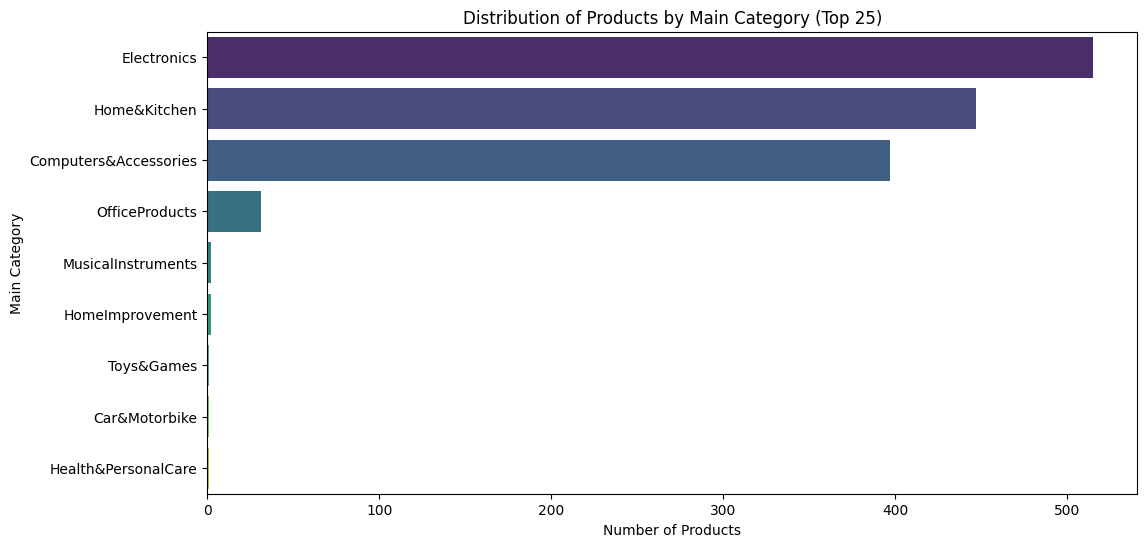

In [16]:
plt.figure(figsize=(12, 6))
sns.barplot(x=mc_counts.values, y=mc_counts.index, palette="viridis")

plt.xlabel('Number of Products')
plt.ylabel('Main Category')
plt.title('Distribution of Products by Main Category (Top 25)')
plt.show()

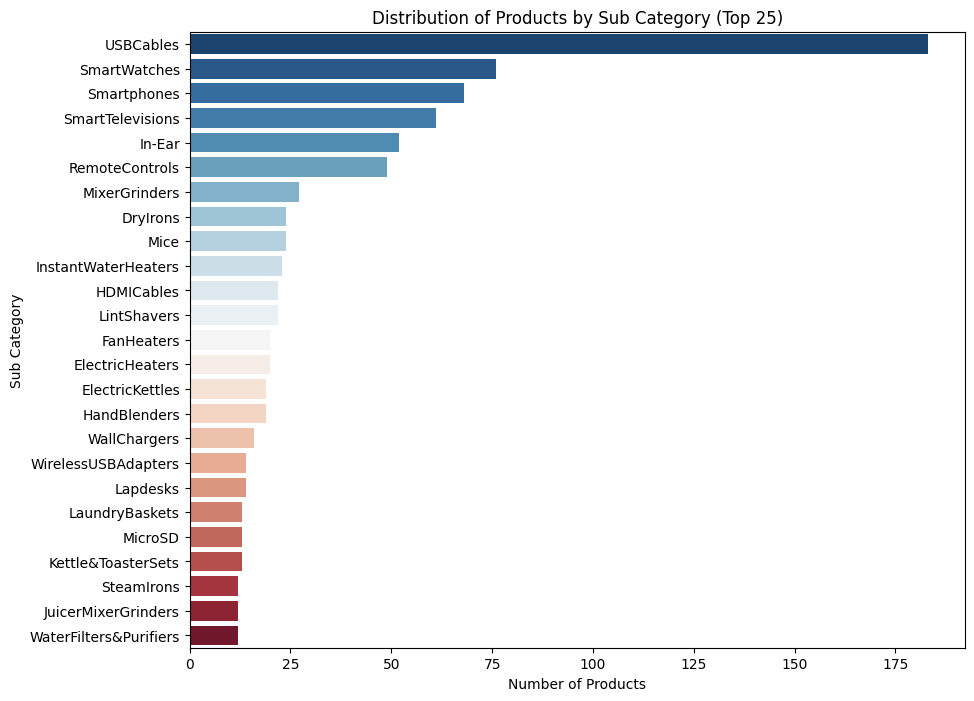

In [17]:
sc_counts = df['sub_category'].value_counts()[:25]
plt.figure(figsize=(10, 8))
sns.barplot(x=sc_counts.values, y=sc_counts.index, palette="RdBu_r")
plt.xlabel('Number of Products')
plt.ylabel('Sub Category')
plt.title('Distribution of Products by Sub Category (Top 25)')
plt.show()

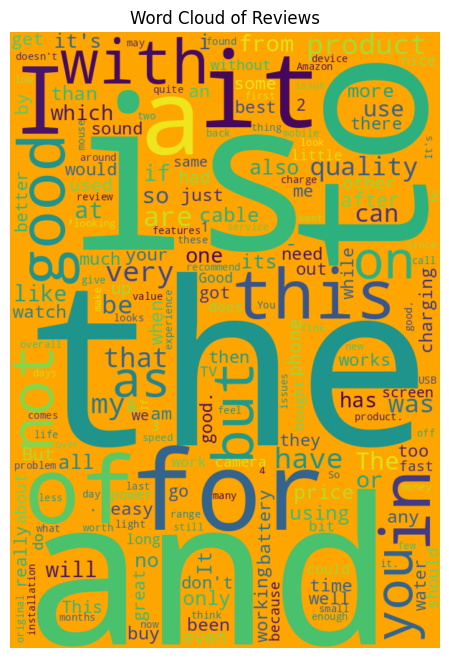

In [18]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

reviews_text = ' '.join(df['review_content'].dropna().values)

word_frequencies = {}
for word in reviews_text.split():
    word_frequencies[word] = word_frequencies.get(word, 0) + 1

wordcloud = WordCloud(width=600, height=860, background_color='orange', min_font_size=12).generate_from_frequencies(word_frequencies)

plt.figure(figsize=(12, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Word Cloud of Reviews')
plt.show()

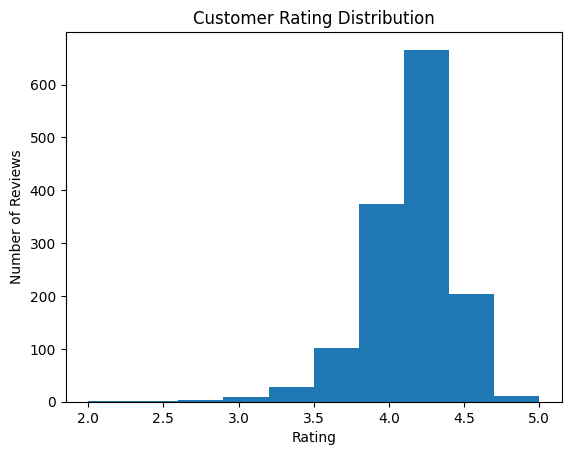

In [19]:
plt.hist(df['rating'])
plt.xlabel('Rating')
plt.ylabel('Number of Reviews')
plt.title('Customer Rating Distribution')
plt.show()

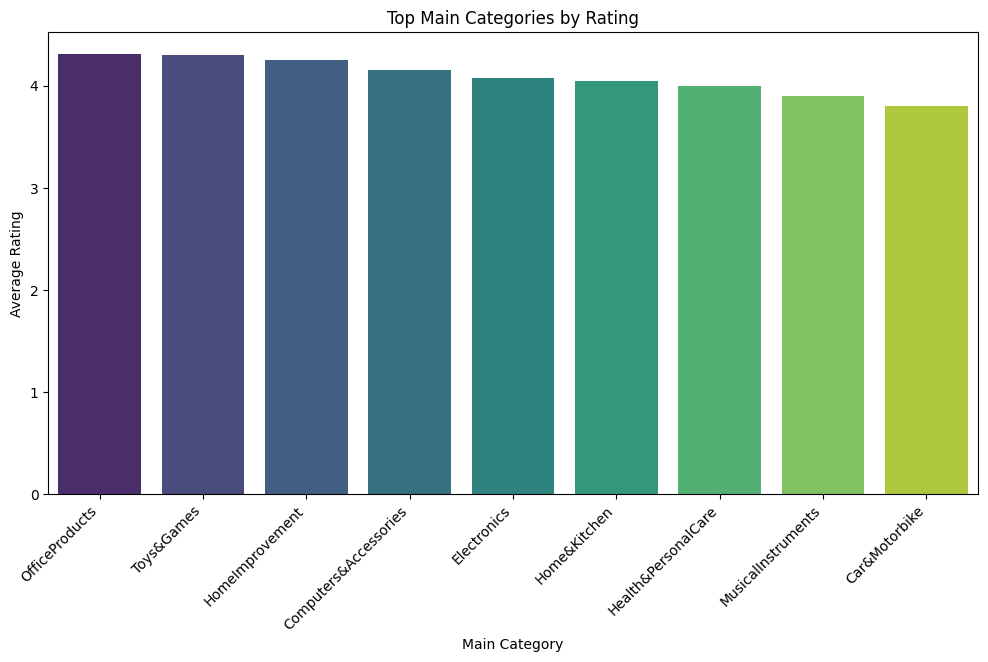

In [20]:

top = df.groupby('main_category')['rating'].mean().sort_values(ascending=False).head(10).reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(x='main_category', y='rating', data=top, palette='viridis')
plt.xlabel('Main Category')
plt.ylabel('Average Rating')
plt.title('Top Main Categories by Rating')
plt.xticks(rotation=45, ha='right')
plt.show()



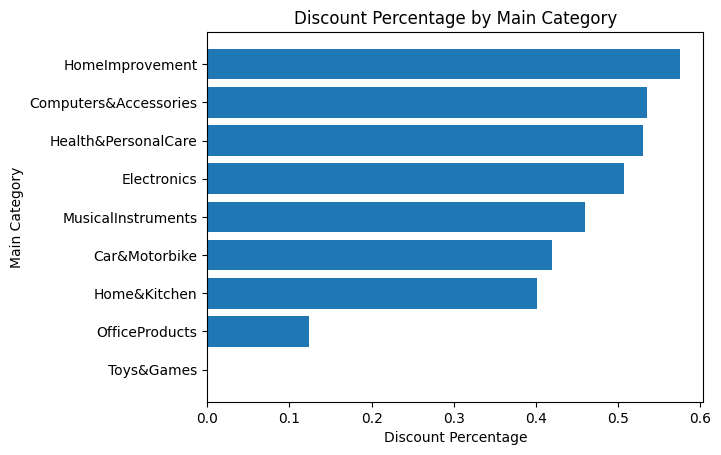

In [21]:
mean_discount_by_category = df.groupby('main_category')['discount_percentage'].mean()
mean_discount_by_category = mean_discount_by_category.sort_values(ascending=True)

plt.barh(mean_discount_by_category.index, mean_discount_by_category.values)
plt.title('Discount Percentage by Main Category')
plt.xlabel('Discount Percentage')
plt.ylabel('Main Category')
plt.show()

<ipython-input-22-dd73e8ae7eaa>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


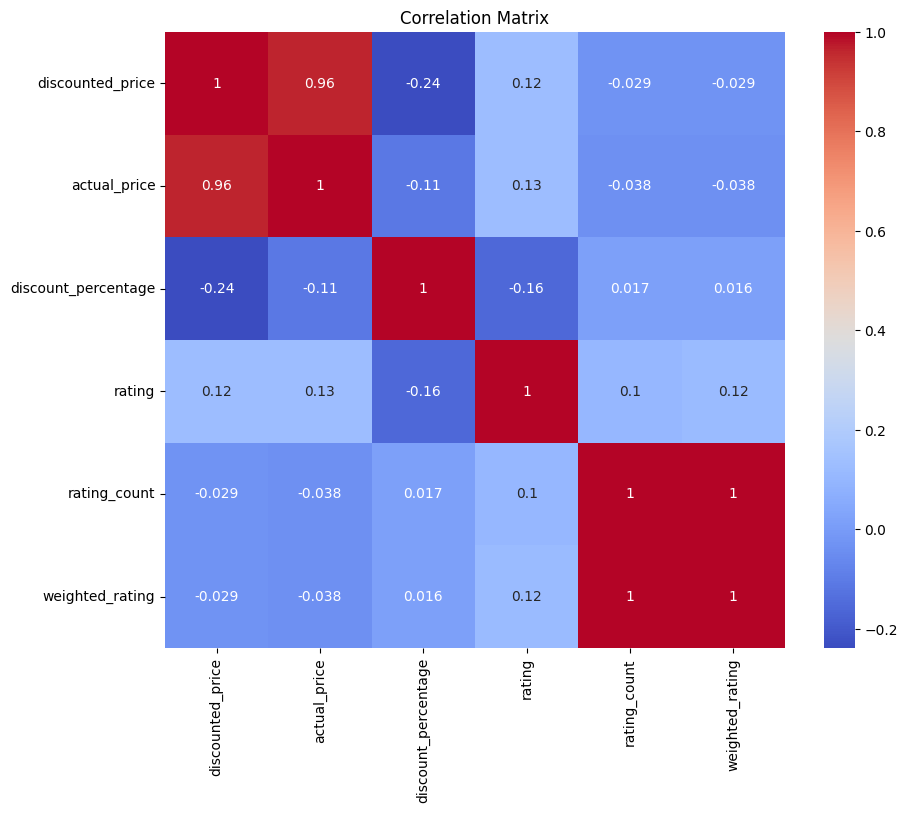

In [22]:
correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1397 entries, 0 to 1464
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   product_id           1397 non-null   object 
 1   product_name         1397 non-null   object 
 2   category             1397 non-null   object 
 3   discounted_price     1397 non-null   float64
 4   actual_price         1397 non-null   float64
 5   discount_percentage  1397 non-null   float64
 6   rating               1397 non-null   float64
 7   rating_count         1397 non-null   float64
 8   about_product        1397 non-null   object 
 9   user_id              1397 non-null   object 
 10  user_name            1397 non-null   object 
 11  review_id            1397 non-null   object 
 12  review_title         1397 non-null   object 
 13  review_content       1397 non-null   object 
 14  weighted_rating      1397 non-null   float64
 15  sub_category         1397 non-null   o

In [25]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder


selected_columns = ['discounted_price', 'actual_price','discount_percentage', 'rating_count', 'rating']
X = df[selected_columns]
y = df['product_name']


label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

tree_model = DecisionTreeClassifier()

tree_model.fit(X_train, y_train)

predictions = tree_model.predict(X_test)

accuracy = accuracy_score(y_test, predictions)
print(f'Accuracy: {accuracy}')


Accuracy: 0.07142857142857142
